In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
from model_utils import * 

from sklearn.utils.class_weight import compute_class_weight
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif


In [258]:
figsize=[5,5]

def compute_search_stats(df):
    """Compute the search rate and hit rate"""
    search_conducted = df['target']
    contraband_found = df['target']
    n_searches  = search_conducted.shape[0]
    n_hits      = contraband_found.sum()

    # Filter out counties with too few searches
    if (n_searches) < 30:
        hit_rate = None
    else:
        hit_rate = n_hits / n_searches

    return(pd.Series(data = {        
        'n_searches': n_searches,
        'n_hits': n_hits,        
        'hit_rate': hit_rate
    }))


def compute_search_stats_cloth(df):
    """Compute the search rate and hit rate"""
    cloth_removed = (df['Removal of more than just outer clothing']) & (df['Gender']=='female')
    cloth_removed_target_true = (cloth_removed) & (df['target'])
    n_cloth_removed  = cloth_removed.sum()
    n_hits      = cloth_removed_target_true.sum()

    # Filter out counties with too few searches
    if (n_cloth_removed) < 1:
        hit_rate = None
    else:
        hit_rate = n_hits / n_cloth_removed

    return(pd.Series(data = {        
        'n_searches': n_cloth_removed,
        'n_hits': n_hits,        
        'hit_rate': hit_rate
    }))


def generate_comparison_scatter(df, ax, station, race, field, color):
    """Generate scatter plot comparing field for white drivers with minority drivers"""
    race_location_agg = df.groupby(['station','Officer-defined ethnicity']).apply(compute_search_stats).reset_index().dropna()
    race_location_agg = race_location_agg.pivot(index='station', columns='Officer-defined ethnicity', values='hit_rate')
    ax = race_location_agg.plot.scatter(ax=ax, x='white', y=race, s=50, label=race, color=color)
    return ax

def format_scatter_chart(ax, station, field):
    """Format and label to scatter chart"""
    ax.set_xlabel('{} - White female'.format(field))
    ax.set_ylabel('{} - Non-White female'.format(field))
    ax.set_title("{} ".format(field))
    lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.set_xlim(0, lim)
    ax.set_ylim(0, lim)
    diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    ax.legend()
    return ax

def generate_comparison_scatters(df, station):
    """Generate scatter plots comparing search rates of white drivers with black and hispanic drivers"""
    fig, axes = plt.figure(),plt.axes()
    generate_comparison_scatter(df, axes, station, 'black', 'hit_rate', 'red')
    generate_comparison_scatter(df, axes, station, 'mixed', 'hit_rate', 'orange')
    generate_comparison_scatter(df, axes, station, 'asian', 'hit_rate', 'blue')
    generate_comparison_scatter(df, axes, station, 'other', 'hit_rate', 'green')
    format_scatter_chart(axes, station, 'Search sucess rate per station')
    
    return fig


def generate_comparison_scatter_cloth(df, ax, station, race, field, color):
    """Generate scatter plot comparing field for white drivers with minority drivers"""
    race_location_agg = df.groupby(['station','Officer-defined ethnicity']).apply(compute_search_stats_cloth).reset_index().dropna()
    race_location_agg = race_location_agg.pivot(index='station', columns='Officer-defined ethnicity', values='hit_rate')
    #print(race_location_agg)
    ax = race_location_agg.plot.scatter(ax=ax, x='white', y=race, s=50, label=race, color=color)
    return ax


def generate_comparison_scatters_cloth(df, station):
    """Generate scatter plots comparing search rates of white drivers with black and hispanic drivers"""
    fig, axes = plt.figure(),plt.axes()
    generate_comparison_scatter_cloth(df, axes, station, 'black', 'hit_rate', 'red')
    generate_comparison_scatter_cloth(df, axes, station, 'mixed', 'hit_rate', 'orange')
    generate_comparison_scatter_cloth(df, axes, station, 'asian', 'hit_rate', 'blue')
    generate_comparison_scatter_cloth(df, axes, station, 'other', 'hit_rate', 'green')
    format_scatter_chart(axes, station, 'Search sucess rate when clothes are removed')
    
    return fig

In [2]:
file_in = 'data/train_cleaned.csv'
file_out = ''

target = 'target'

# Read data

df = pd.read_csv(file_in)
df.head()


df_raw=pd.read_csv("data/train.csv")


In [277]:
df["station_object"]=df["station"]+df["Object of search"]

In [280]:
len(df["station_object"].unique())

387

In [281]:
62286./387

160.94573643410854

In [282]:
(309317-62286)/387

638.3229974160207

In [94]:

compute_search_stats(df)

n_searches    309317.000000
n_hits         62286.000000
hit_rate           0.201366
dtype: float64

In [208]:
df["Age range"].unique()

array(['18-24', '25-34', 'over 34', '10-17', 'under 10'], dtype=object)

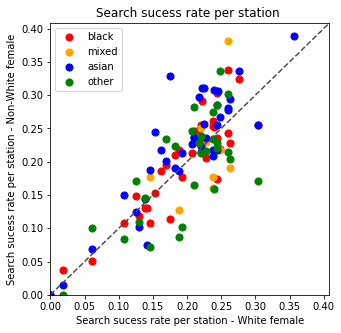

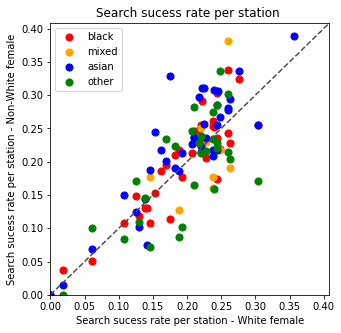

In [286]:
plt.rcParams["figure.figsize"]=[5,5]
generate_comparison_scatters(df, 'essex')

Officer-defined ethnicity  asian     black  mixed  other     white
station                                                           
avon-and-somerset            NaN  0.428571    0.0   0.00  0.200000
bedfordshire                 NaN  0.000000    NaN    NaN  0.000000
cambridgeshire               NaN       NaN    NaN    NaN  0.000000
cheshire                     NaN       NaN    NaN    NaN  0.344828
city-of-london             0.000  0.000000    NaN    NaN  0.200000
cumbria                    0.500  0.000000    NaN    NaN  0.189189
derbyshire                   NaN  0.000000    NaN    NaN  0.083333
devon-and-cornwall           NaN  0.000000    NaN   0.00  0.285714
dorset                       NaN  0.250000    NaN    NaN  0.255319
durham                       NaN       NaN    NaN    NaN  0.300000
dyfed-powys                  NaN       NaN    NaN    NaN  0.162162
essex                      1.000  0.166667    NaN   0.00  0.222222
gloucestershire              NaN       NaN    NaN    NaN  0.09

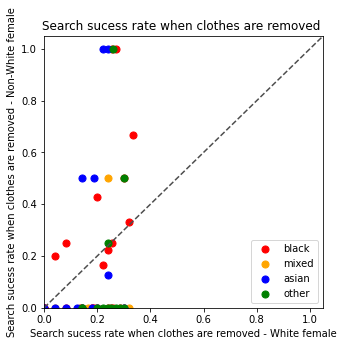

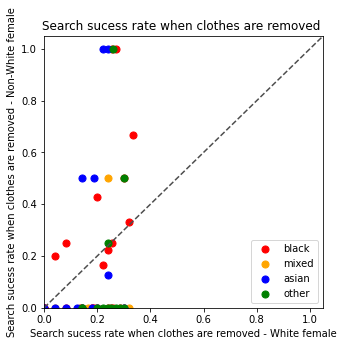

In [259]:
plt.rcParams["figure.figsize"]=[5,5]
generate_comparison_scatters_cloth(df, 'essex')
#TO DO to analyze for female needed to require nsamples < 10


In [18]:

df[df[target]].shape

(62286, 23)

In [15]:
pd.crosstab(df['Object of search'],df['Officer-defined ethnicity'],normalize='columns')

Officer-defined ethnicity,asian,black,mixed,other,white
Object of search,,,,,
anything to threaten or harm anyone,0.018091,0.024424,0.014754,0.018534,0.015959
article for use in theft,0.066119,0.058771,0.071585,0.088162,0.109053
articles for use in criminal damage,0.036061,0.007097,0.011475,0.011521,0.021804
controlled drugs,0.692816,0.665008,0.603279,0.597262,0.619701
crossbows,0.000040,0.000092,0.000000,0.000000,0.000053
detailed object of search unavailable,0.000201,0.000338,0.000000,0.000334,0.000455
evidence of offences under the act,0.003989,0.006421,0.009290,0.013191,0.006251
evidence of wildlife offences,0.000000,0.000000,0.000000,0.000668,0.000086
firearms,0.015754,0.010200,0.007650,0.011521,0.009057


In [16]:
pd.crosstab(df['Object of search'],df['Gender'],normalize="columns")

Gender,female,male,other
Object of search,,,
anything to threaten or harm anyone,0.018258,0.016923,0.022059
article for use in theft,0.061275,0.104033,0.099265
articles for use in criminal damage,0.018927,0.021371,0.040441
controlled drugs,0.625848,0.630292,0.588235
crossbows,0.000096,0.000050,0.000000
detailed object of search unavailable,0.000414,0.000414,0.003676
evidence of offences under the act,0.006692,0.006187,0.007353
evidence of wildlife offences,0.000000,0.000086,0.003676
firearms,0.008253,0.009911,0.022059


In [19]:
df[~df[target]].shape

(247031, 23)

Text(0.5, 0, 'Search Sucess Rate')

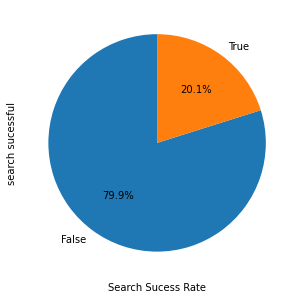

In [61]:
df["search sucessful"]=df["target"]
plt.rcParams["figure.figsize"]=[5,5]
sucess_rate=df["search sucessful"].value_counts()/df.shape[0]
sucess_rate.plot.pie(autopct='%1.1f%%',startangle=90)
plt.xlabel("Search Sucess Rate")


In [283]:

df["Object of search"].unique()
weights=compute_class_weight(class_weight='balanced',classes=df["Object of search"].unique(), y=df["Object of search"])
weighs_map = {}

i=0
for obj in df["Object of search"].unique():
    weighs_map[obj]=weights[i]
    i+=1
    
df["weight"]=df["Object of search"].map(weighs_map)

df.head()
#weights.sum()

df_resampled=df.groupby("Object of search").sample(
    n=1000,
    replace=True,
    weights=df["weight"],
    random_state=1,
)


Text(0.5, 0, 'Search ratio per object of search')

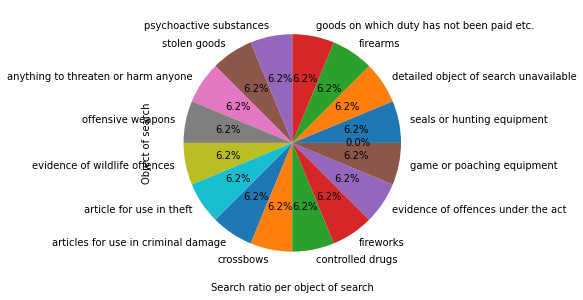

In [131]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df_resampled["Object of search"].value_counts()/df_resampled.shape[0]
object_low_search=object_search[object_search < 0.0095]
object_search=object_search.drop(index=object_low_search.index.to_list())

object_low_search_s=pd.Series([object_low_search.sum()],index=['other'])
object_search=object_search.append(object_low_search_s)
object_search.plot.pie(autopct='%1.1f%%')
plt.ylabel("Object of search")
plt.xlabel("Search ratio per object of search")

Text(0, 0.5, '# of searches per station')

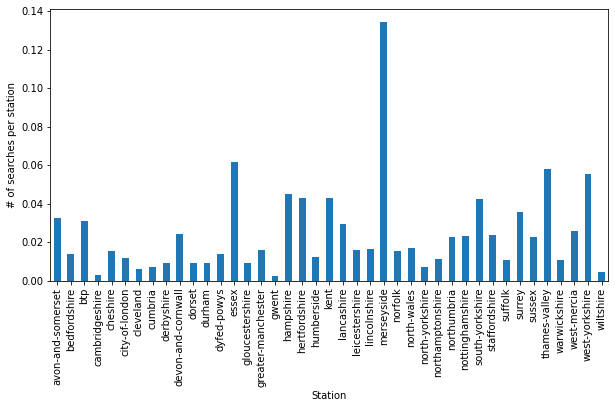

In [18]:
plt.rcParams["figure.figsize"]=[10,5]
object_search=df["station"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.bar()
plt.xlabel("Station")
plt.ylabel("# of searches per station")


#object_low_search=object_search[object_search < 0.05]
#object_search=object_search.drop(index=object_low_search.index.to_list())

#object_low_search_s=pd.Series([object_low_search.sum()],index=['other'])
#object_search=object_search.append(object_low_search_s)
#object_search.plot.pie(autopct='%1.1f%%')
#plt.ylabel("Station")
#plt.xlabel("Search ratio per station")

Text(0, 0.5, '# of searches per year')

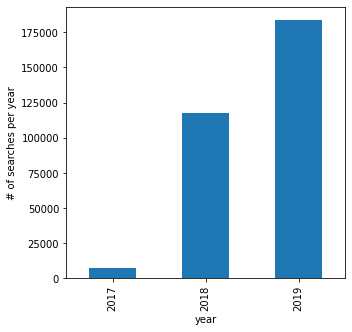

In [142]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["year"].value_counts()
object_search=object_search.sort_index()
object_search.plot.bar()
plt.xlabel("year")
plt.ylabel("# of searches per year")

Text(0, 0.5, 'Search ratio per age range')

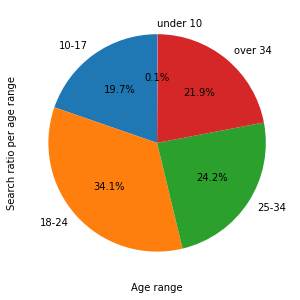

In [79]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Age range"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Age range")

Text(0, 0.5, 'Search ratio per gender')

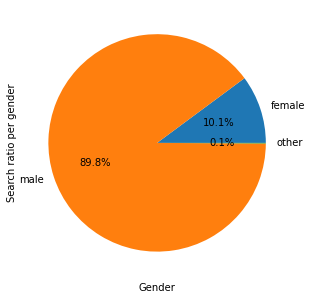

In [81]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Gender"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Gender")

Text(0, 0.5, 'Search ratio per officer-defined ethnicity')

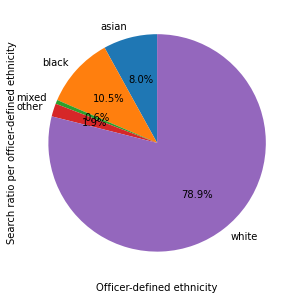

In [82]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Officer-defined ethnicity"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Officer-defined ethnicity")

/home/ppribeir/dev/private/LDSSA/projects/batch4-workspace/batch4-capstone/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


Text(0.5, 0, 'Removal of more than just outer clothing')

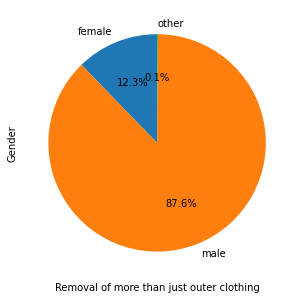

In [153]:
plt.rcParams["figure.figsize"]=[5,5]
df_cloth=df[df["Removal of more than just outer clothing"]]
object_search=df_cloth["Gender"].value_counts()/df_cloth.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Gender")
plt.xlabel("Removal of more than just outer clothing")

Text(0, 0.5, 'Search ratio per type')

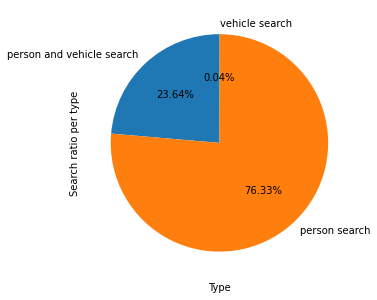

In [141]:


plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Type"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.2f%%',startangle=90)
plt.ylabel("Type of search")

TypeError: 'str' object is not callable

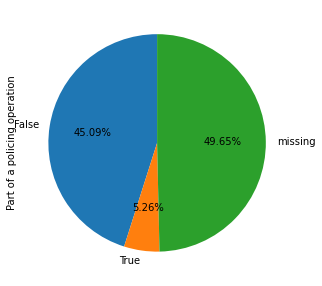

In [186]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Part of a policing operation"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.2f%%',startangle=90)
plt.ylabel("Part of a policing operation")

In [95]:
df_raw["Officer-defined ethnicity"].value_counts()

White    378311
Black    174593
Asian     86035
Other     19842
Mixed      1830
Name: Officer-defined ethnicity, dtype: int64

In [96]:

likelihood = search_likelihood(df_raw,"Officer-defined ethnicity" )

Asian   NaN
Black   NaN
Mixed   NaN
Other   NaN
White   NaN
asian   NaN
black   NaN
mixed   NaN
other   NaN
white   NaN
dtype: float64




In [ ]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df,title='report')
profile.to_file("profile_report.html")

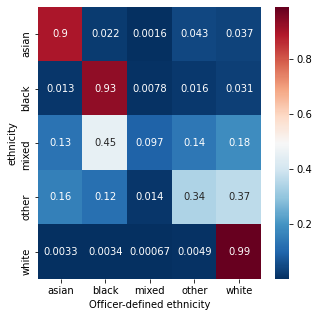

In [166]:
df_=df.loc[df["ethnicity"]!="missing",:]
#df_["Self-defined ethnicity"]=df_["ethnicity"]
crosstab_1 = pd.crosstab(df_["ethnicity"], df_["Officer-defined ethnicity"],normalize='index')

#crosstab_1=crosstab_1/df.shape[0]
crosstab_1
sns.heatmap(crosstab_1, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); #

In [3]:
#df_sucess_rate, df_sucess_rate_group = verify_no_discrimination_1(X_test, y_true, sensitive_column='Officer-defined ethnicity', min_samples=30)
df_sucess_rate_ethnicity = pd.read_csv("data/df_sucess_rate_ethnicity.csv")
df_sucess_rate_ethnicity_station = pd.read_csv("data/df_sucess_rate_ethnicity_station.csv")

df_sucess_rate_gender=pd.read_csv("data/df_sucess_rate_gender.csv")
df_sucess_rate_gender_station=pd.read_csv("data/df_sucess_rate_gender_station.csv")

df_sucess_rate_object=pd.read_csv("data/df_sucess_rate_object.csv")
df_sucess_rate_object_ethnicity=pd.read_csv("data/df_sucess_rate_object_ethnicity.csv")
df_sucess_rate_object_gender=pd.read_csv("data/df_sucess_rate_object_gender.csv")
df_sucess_rate_object_station=pd.read_csv("data/df_sucess_rate_object_station.csv")

Text(0.5, 1.0, 'Search sucess rate per ethnicity group')

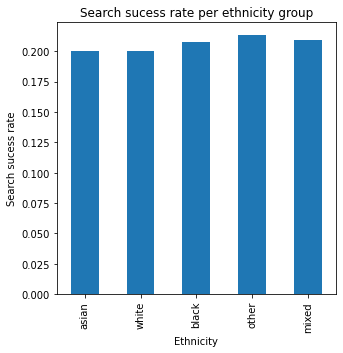

In [4]:
#df_sucess_rate_ethnicity=df_sucess_rate_ethnicity.rename({'Unnamed: 0': 'Station'})
plt.rcParams["figure.figsize"]=[5,5]
df_sucess_rate_ethnicity=df_sucess_rate_ethnicity.set_index('Unnamed: 0')
df_sucess_rate_ethnicity.plot.bar(legend=False)
plt.xlabel("Ethnicity")
plt.ylabel("Search sucess rate")
plt.title("Search sucess rate per ethnicity group")

In [44]:
df_sucess_rate_ethnicity_station = pd.read_csv("data/model_discrimation_precision.csv")

In [39]:
df_sucess_rate_ethnicity_station.head()
df_sucess_rate_ethnicity_station=df_sucess_rate_ethnicity_station.set_index("Unnamed: 0")
df_sucess_rate_ethnicity_station=df_sucess_rate_ethnicity_station.sort_index()

In [40]:
df_sucess_rate_ethnicity_station

,other,black,asian,mixed
Unnamed: 0,,,,
avon-and-somerset,0.054067,-0.036215,-0.006227,0.035997
bedfordshire,NaN,0.039175,0.017569,NaN
btp,-0.011742,-0.021428,-0.014631,NaN
cambridgeshire,NaN,NaN,NaN,NaN
cheshire,NaN,0.082334,NaN,NaN
city-of-london,-0.103797,0.031917,0.000325,NaN
cleveland,NaN,NaN,0.014712,NaN
cumbria,NaN,NaN,NaN,NaN
derbyshire,NaN,0.010019,0.016880,NaN


In [34]:
palette = {'asian': 'C0',
               'black': 'C1',
               'other': 'C2',
               'mixed': 'C3'}

In [43]:
df_sucess_rate_ethnicity_station_[(df_sucess_rate_ethnicity_station_.abs()>0.05).any(axis=1)].shape

(16, 4)

In [31]:
df_sucess_rate_ethnicity_station_[(df_sucess_rate_ethnicity_station_.abs()>0.05)]

,other,black,asian,mixed
Unnamed: 0,,,,
avon-and-somerset,NaN,NaN,NaN,NaN
bedfordshire,NaN,NaN,NaN,NaN
btp,NaN,-0.073288,NaN,NaN
cambridgeshire,NaN,NaN,NaN,NaN
cheshire,NaN,0.066944,NaN,NaN
city-of-london,-0.131868,NaN,NaN,NaN
cleveland,NaN,NaN,NaN,NaN
cumbria,NaN,NaN,NaN,NaN
derbyshire,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Negative difference in search sucess rate compared to whites ')

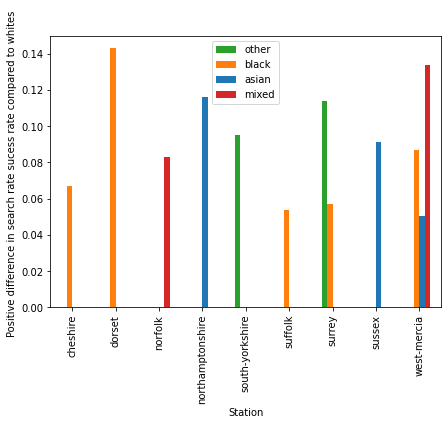

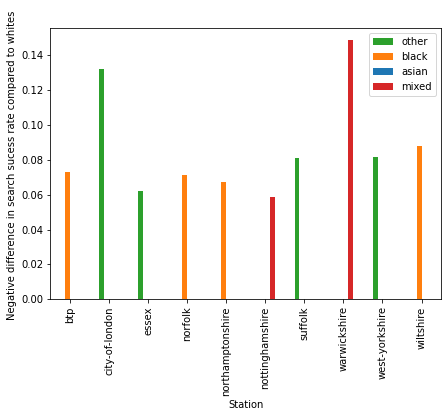

In [22]:
plt.rcParams["figure.figsize"]=[7,5]
df_sucess_rate_ethnicity_station_=df_sucess_rate_ethnicity_station.fillna(0)
df_sucess_rate_ethnicity_station_=df_sucess_rate_ethnicity_station_.rename({"Unnamed:0":"Station"})
df_sucess_rate_ethnicity_station_true_pos = (df_sucess_rate_ethnicity_station_>0.05).any(axis=1)
df_sucess_rate_ethnicity_station_true_neg = (df_sucess_rate_ethnicity_station_<-0.05).any(axis=1)
df_sucess_rate_discrimination_pos  = df_sucess_rate_ethnicity_station_[df_sucess_rate_ethnicity_station_true_pos]
df_sucess_rate_discrimination_neg  = df_sucess_rate_ethnicity_station_[df_sucess_rate_ethnicity_station_true_neg]
df_sucess_rate_discrimination_pos[df_sucess_rate_discrimination_pos>0.05].abs().plot.bar(color=palette)
plt.xlabel("Station")
plt.ylabel("Positive difference in search rate sucess rate compared to whites ")
df_sucess_rate_discrimination_neg[df_sucess_rate_discrimination_neg<-0.05].abs().plot.bar(color=palette)
plt.xlabel("Station")
plt.ylabel("Negative difference in search sucess rate compared to whites ")





In [7]:
df_sucess_rate_discrimination_neg.index

Index(['btp', 'city-of-london', 'essex', 'norfolk', 'northamptonshire',
       'nottinghamshire', 'suffolk', 'warwickshire', 'west-yorkshire',
       'wiltshire'],
      dtype='object', name='Unnamed: 0')

In [23]:
df_sucess_rate_discrimination_pos.index

Index(['cheshire', 'dorset', 'norfolk', 'northamptonshire', 'south-yorkshire',
       'suffolk', 'surrey', 'sussex', 'west-mercia'],
      dtype='object', name='Unnamed: 0')

In [8]:
df_sucess_rate_discrimination_pos.shape

(9, 4)

In [9]:
df_sucess_rate_discrimination_neg.shape

(10, 4)

In [108]:
df_sucess_rate_ethnicity_station[(df_sucess_rate_ethnicity_station_.abs()>0.05).any(axis=1)].index

Index(['avon-and-somerset', 'bedfordshire', 'btp', 'cambridgeshire',
       'cheshire', 'city-of-london', 'cleveland', 'derbyshire', 'dorset',
       'gloucestershire', 'greater-manchester', 'hampshire', 'lincolnshire',
       'norfolk', 'north-yorkshire', 'northamptonshire', 'northumbria',
       'nottinghamshire', 'staffordshire', 'suffolk', 'warwickshire',
       'west-mercia', 'wiltshire'],
      dtype='object', name='Unnamed: 0')

In [107]:
df1=df_sucess_rate_ethnicity_station.drop(columns=["black","asian"])
df1[(df1.abs()>0.05).any(axis=1)].shape

(12, 2)

In [7]:
df["station"].unique()
df_sucess_rate_ethnicity_station.head()

,asian,black,other,mixed
Unnamed: 0,,,,
avon-and-somerset,0.019702,-0.028313,0.088006,-0.030369
bedfordshire,0.019528,-0.016315,-0.091303,NaN
btp,-0.025268,-0.068549,-0.022895,NaN
cambridgeshire,0.153615,-0.061535,NaN,NaN
cheshire,0.060289,0.048159,NaN,NaN


In [271]:
df_sucess_rate_ethnicity_station.loc['leicestershire']

asian    0.042153
black   -0.000536
other   -0.024916
mixed         NaN
Name: leicestershire, dtype: float64

Text(0.5, 1.0, 'Difference in Search sucess rate per station')

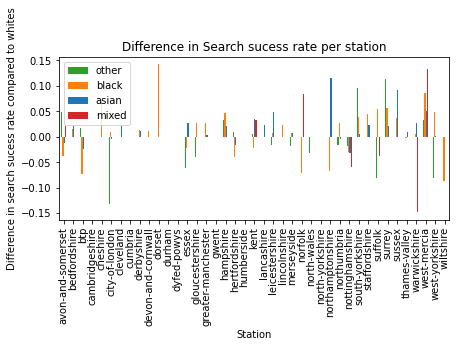

In [26]:
#TODO remove from plots entries with zeros

#df_sucess_rate_ethnicity_station=df_sucess_rate_ethnicity_station.rename({'Unnamed: 0': 'Station'})
#df_sucess_rate_ethnicity_station=df_sucess_rate_ethnicity_station.set_index('Unnamed: 0')
#df_sucess_rate_ethnicity_station=df_sucess_rate_ethnicity_station.sort_index()
df_sucess_rate_ethnicity_station.plot.bar(color=palette )
plt.rcParams["figure.figsize"]=[7,3]
plt.xlabel("Station")
plt.ylabel("Difference in search sucess rate compared to whites")
plt.title("Difference in Search sucess rate per station")

In [46]:
df_sucess_rate_ethnicity_station_first = pd.read_csv("data/df_sucess_rate_ethnicity_station_first.csv")
df_sucess_rate_ethnicity_station_second = pd.read_csv("data/df_sucess_rate_ethnicity_station_second.csv")
df_sucess_rate_ethnicity_station_third = pd.read_csv("data/df_sucess_rate_ethnicity_station_third.csv")
df_sucess_rate_ethnicity_station_forth = pd.read_csv("data/df_sucess_rate_ethnicity_station_forth.csv")

In [47]:
df_sucess_rate_ethnicity_station_first.head()

,Unnamed: 0,asian,other,black,mixed
0,lancashire,0.000000,NaN,0.000000,NaN
1,gloucestershire,NaN,NaN,-0.138226,NaN
2,suffolk,NaN,NaN,NaN,NaN
3,dyfed-powys,NaN,NaN,NaN,NaN
4,west-yorkshire,-0.005209,NaN,0.069452,NaN


Text(0.5, 1.0, 'Difference in station search sucess rate per ethnicity for first trimester')

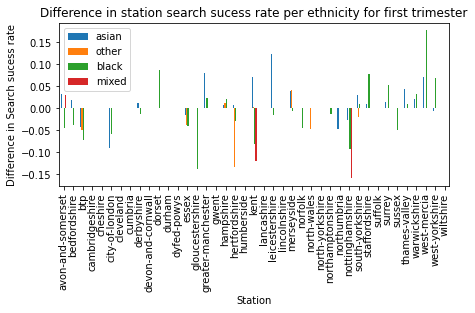

In [48]:
df_sucess_rate_ethnicity_station_first=df_sucess_rate_ethnicity_station_first.set_index('Unnamed: 0')
df_sucess_rate_ethnicity_station_first=df_sucess_rate_ethnicity_station_first.sort_index()
df_sucess_rate_ethnicity_station_first.plot.bar()
plt.rcParams["figure.figsize"]=[7,3]
plt.xlabel("Station")
plt.ylabel("Difference in Search sucess rate")
plt.title("Difference in station search sucess rate per ethnicity for first trimester")

Text(0.5, 1.0, 'Difference in station search sucess rate per ethnicity for second trimester')

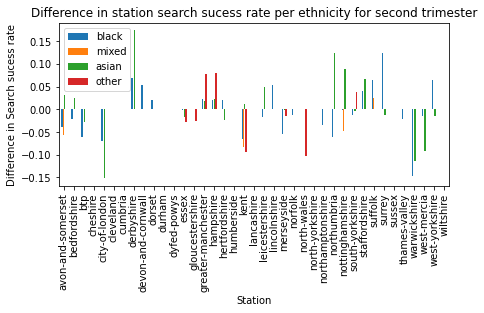

In [148]:
df_sucess_rate_ethnicity_station_second=df_sucess_rate_ethnicity_station_second.set_index('Unnamed: 0')
df_sucess_rate_ethnicity_station_second=df_sucess_rate_ethnicity_station_second.sort_index()
df_sucess_rate_ethnicity_station_second.plot.bar()
plt.rcParams["figure.figsize"]=[7,3]
plt.xlabel("Station")
plt.ylabel("Difference in Search sucess rate")
plt.title("Difference in station search sucess rate per ethnicity for second trimester")

Text(0.5, 1.0, 'Difference in station search sucess rate per ethnicity for third trimester')

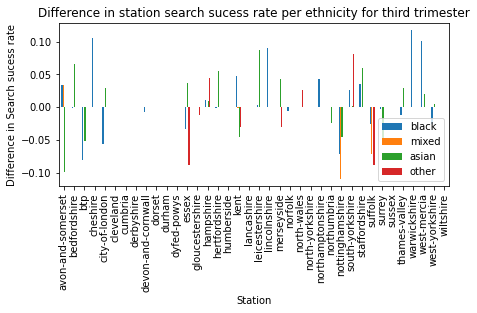

In [160]:
#df_sucess_rate_ethnicity_station_third=df_sucess_rate_ethnicity_station_third.set_index('Unnamed: 0')
df_sucess_rate_ethnicity_station_third=df_sucess_rate_ethnicity_station_third.sort_index()
df_sucess_rate_ethnicity_station_third.plot.bar()
plt.rcParams["figure.figsize"]=[7,3]
plt.xlabel("Station")
plt.ylabel("Difference in Search sucess rate")
plt.title("Difference in station search sucess rate per ethnicity for third trimester")

Text(0.5, 1.0, 'Difference in station search sucess rate per ethnicity for forth trimester')

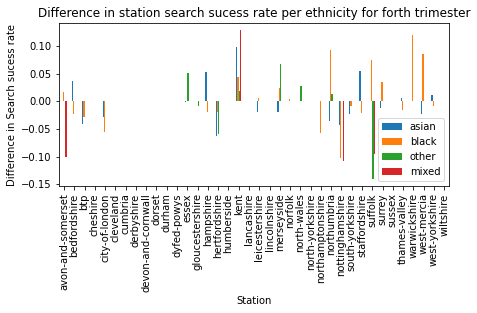

In [159]:
#df_sucess_rate_ethnicity_station_forth=df_sucess_rate_ethnicity_station_forth.set_index('Unnamed: 0')
df_sucess_rate_ethnicity_station_forth=df_sucess_rate_ethnicity_station_forth.sort_index()
df_sucess_rate_ethnicity_station_forth.plot.bar()
plt.rcParams["figure.figsize"]=[7,3]
plt.xlabel("Station")
plt.ylabel("Difference in Search sucess rate")
plt.title("Difference in station search sucess rate per ethnicity for forth trimester")

In [49]:
df_sucess_rate_ethnicity_station_2018 = pd.read_csv("data/df_sucess_rate_ethnicity_station_2018.csv")
df_sucess_rate_ethnicity_station_2019 = pd.read_csv("data/df_sucess_rate_ethnicity_station_2019.csv")


Text(0.5, 1.0, 'Difference in station search sucess rate per ethnicity for 2018')

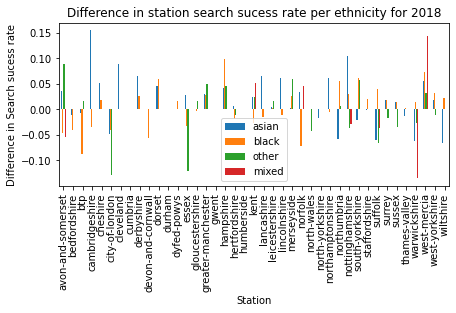

In [50]:
df_sucess_rate_ethnicity_station_2018=df_sucess_rate_ethnicity_station_2018.set_index('Unnamed: 0')
df_sucess_rate_ethnicity_station_2018=df_sucess_rate_ethnicity_station_2018.sort_index()
df_sucess_rate_ethnicity_station_2018.plot.bar()
plt.rcParams["figure.figsize"]=[7,3]
plt.xlabel("Station")
plt.ylabel("Difference in Search sucess rate")
plt.title("Difference in station search sucess rate per ethnicity for 2018")

Text(0.5, 1.0, 'Difference in station search sucess rate per ethnicity for 2019')

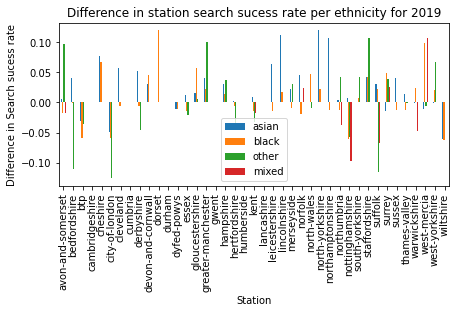

In [51]:
df_sucess_rate_ethnicity_station_2019=df_sucess_rate_ethnicity_station_2019.set_index('Unnamed: 0')
df_sucess_rate_ethnicity_station_2019=df_sucess_rate_ethnicity_station_2019.sort_index()
df_sucess_rate_ethnicity_station_2019.plot.bar()
plt.rcParams["figure.figsize"]=[7,3]
plt.xlabel("Station")
plt.ylabel("Difference in Search sucess rate")
plt.title("Difference in station search sucess rate per ethnicity for 2019")

Text(0.5, 1.0, 'Search sucess rate per gender')

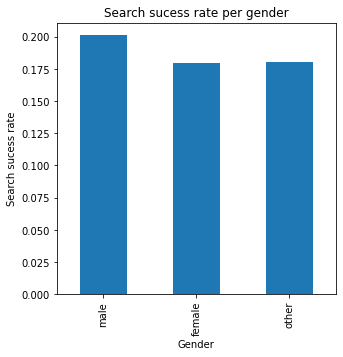

In [11]:
#df_sucess_rate_gender=df_sucess_rate_gender.rename({'Unnamed: 0': 'Station'})
#df_sucess_rate_gender=df_sucess_rate_gender.set_index('Unnamed: 0')
df_sucess_rate_gender.plot.bar(legend=False)
plt.rcParams["figure.figsize"]=[5,5]
plt.xlabel("Gender")
plt.ylabel("Search sucess rate")
plt.title("Search sucess rate per gender")


Text(0.5, 1.0, 'Difference in station search sucess rate per gender')

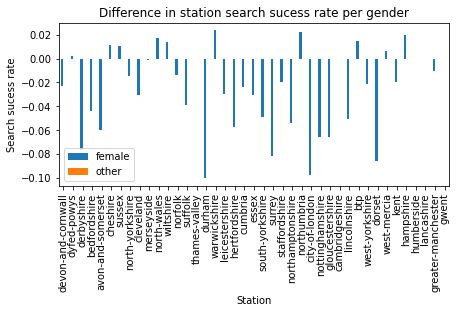

In [55]:
df_sucess_rate_gender_station=df_sucess_rate_gender_station.rename({'Unnamed: 0': 'Station'})
df_sucess_rate_gender_station=df_sucess_rate_gender_station.set_index('Unnamed: 0')
df_sucess_rate_gender_station.plot.bar()
plt.xlabel("Station")
plt.ylabel("Search sucess rate")
plt.title("Difference in station search sucess rate per gender")



In [198]:
print(df_sucess_rate_object)

                                    Unnamed: 0  Object of search
0                             controlled drugs          0.250765
1                            offensive weapons          0.100023
2                                 stolen goods          0.191785
3                     article for use in theft          0.093968
4          articles for use in criminal damage          0.035376
5                                     firearms          0.098435
6          anything to threaten or harm anyone          0.063808
7                                    crossbows               NaN
8           evidence of offences under the act          0.117949
9                                    fireworks          0.006901
10                     psychoactive substances          0.290867
11                  game or poaching equipment          0.340000
12               evidence of wildlife offences               NaN
13  goods on which duty has not been paid etc.               NaN
14       detailed object 

Text(0.5, 1.0, 'Search sucess rate per object of search')

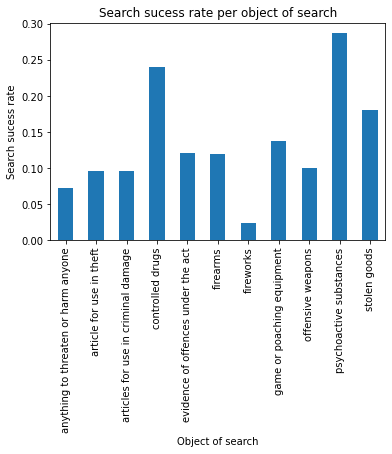

In [300]:
#df_sucess_rate_object=df_sucess_rate_object.rename({'Unnamed: 0': 'Station'})
df_sucess_rate_object=df_sucess_rate_object.set_index('Unnamed: 0')
df_sucess_rate_object=df_sucess_rate_object.drop("crossbows")
df_sucess_rate_object=df_sucess_rate_object.drop("evidence of wildlife offences")
df_sucess_rate_object=df_sucess_rate_object.drop("detailed object of search unavailable")
df_sucess_rate_object=df_sucess_rate_object.drop("goods on which duty has not been paid etc.")


df_sucess_rate_object=df_sucess_rate_object.sort_index()
df_sucess_rate_object.plot.bar(legend=False)
plt.rcParams["figure.figsize"]=[5,5]
plt.xlabel("Object of search")
plt.ylabel("Search sucess rate")
plt.title("Search sucess rate per object of search")


In [170]:
df_sucess_rate_object_gender.head()

,female,other
Unnamed: 0,,
controlled drugs,-0.063189,0.06196
offensive weapons,-0.004941,NaN
stolen goods,0.070417,NaN
article for use in theft,0.041534,NaN
articles for use in criminal damage,0.006853,NaN


Text(0.5, 1.0, 'Difference in object search sucess rate between females and males')

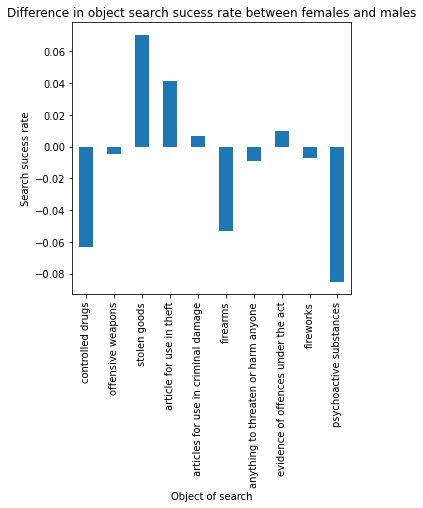

In [177]:
#df_sucess_rate_object_gender=df_sucess_rate_object_gender.rename({'Unnamed: 0': 'Station'})
#df_sucess_rate_object_gender=df_sucess_rate_object_gender.set_index('Unnamed: 0')
#df_sucess_rate_object_gender=df_sucess_rate_object_gender.drop(columns=['other'])
plt.rcParams["figure.figsize"]=[5,5]
#df_sucess_rate_object_gender=df_sucess_rate_object_gender.drop("game or poaching equipment")
df_sucess_rate_object_gender.plot.bar(legend=False)
plt.xlabel("Object of search")
plt.ylabel("Search sucess rate")
plt.title("Difference in object search sucess rate between females and males")


Text(0.5, 1.0, 'Object search sucess rate per ethnicity compared to white population')

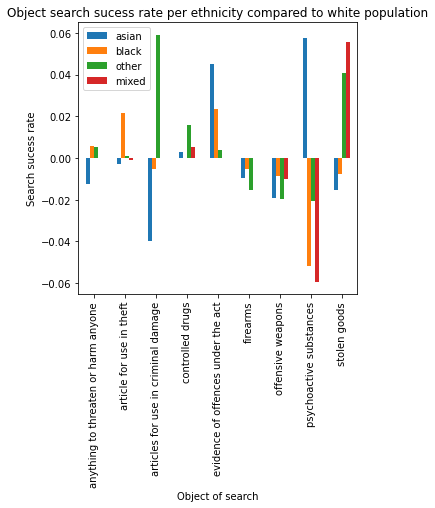

In [167]:
#df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.set_index('Unnamed: 0')

#df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.drop("crossbows")
#df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.drop("evidence of wildlife offences")
#df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.drop("detailed object of search unavailable")
#df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.drop("goods on which duty has not been paid etc.")
#df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.drop("game or poaching equipment")
#df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.drop("fireworks")

plt.rcParams["figure.figsize"]=[5,5]
df_sucess_rate_object_ethnicity=df_sucess_rate_object_ethnicity.sort_index()
df_sucess_rate_object_ethnicity.plot.bar()
plt.xlabel("Object of search")
plt.ylabel("Search sucess rate")
plt.title("Object search sucess rate per ethnicity compared to white population")


In [ ]:
# object search rate by age

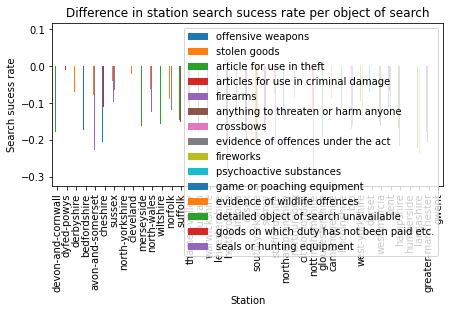

In [37]:
#df_sucess_rate_object_station=df_sucess_rate_object_station.set_index('Unnamed: 0')
df_sucess_rate_object_station.plot.bar()
plt.xlabel("Station")
plt.ylabel("Search sucess rate")
plt.title("Difference in station search sucess rate per object of search")
plt.legend(loc='upper right')


In [ ]:
# cloth removal vs age and ethnicity
# 2D histogram of latitudes and longitudes : for several months
# officer etnicity vs self defined etchnicity ( make an heatmap)
# likelihood of search ( normalized by population)
# Search sucess rate per station etchnnicity and month
# TO DO use scatter plots
# Check if when officer defined etchinity is differed than self defined etchinity then
# there is more discrimination


In [48]:
# TO DO exclude metropolitan or not ?
df_cloth_removal_ethnicity=pd.read_csv("data/df_cloth_removal_ethnicity.csv")
df_cloth_removal_ethnicity_age=pd.read_csv("data/df_cloth_removal_ethnicity_age.csv")
df_cloth_removal_gender=pd.read_csv("data/df_cloth_removal_gender.csv")
df_cloth_removal_gender_age=pd.read_csv("data/df_cloth_removal_gender_age.csv")
df_cloth_removal_ethnicity_age_female=pd.read_csv("data/df_cloth_removal_ethnicity_age_female.csv")




Text(0.5, 1.0, 'Cloth removal rate per ethnicity')

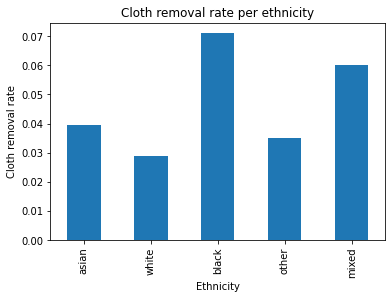

In [44]:
#df_cloth_removal_ethnicity=df_cloth_removal_ethnicity.rename({'Unnamed: 0': 'Station'})
df_cloth_removal_ethnicity=df_cloth_removal_ethnicity.set_index('Unnamed: 0')
df_cloth_removal_ethnicity.plot.bar(legend=False)
plt.xlabel("Ethnicity")
plt.ylabel("Cloth removal rate")
plt.title("Cloth removal rate per ethnicity")


Text(0.5, 1.0, 'Cloth removal rate per gender')

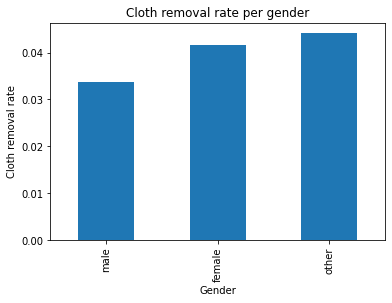

In [47]:
#df_cloth_removal_gender=df_cloth_removal_gender.set_index('Unnamed: 0')
df_cloth_removal_gender.plot.bar(legend=False)
plt.xlabel("Gender")
plt.ylabel("Cloth removal rate")
plt.title("Cloth removal rate per gender")

#Use this plot


In [66]:
df_cloth_removal_ethnicity_age.head()

,Unnamed: 0,asian,black,other,mixed
0,18-24,0.017334,0.061633,0.012175,0.049223
1,25-34,0.000876,0.044420,0.005880,0.043504
2,over 34,0.000659,0.021346,-0.003219,0.017833
3,10-17,0.015676,0.023502,0.005082,0.010455
4,under 10,NaN,-0.017595,NaN,NaN


Index(['18-24', '25-34', 'over 34', '10-17'], dtype='object', name='Unnamed: 0')


Text(0.5, 1.0, 'Cloth removal rate per age and ethnicity')

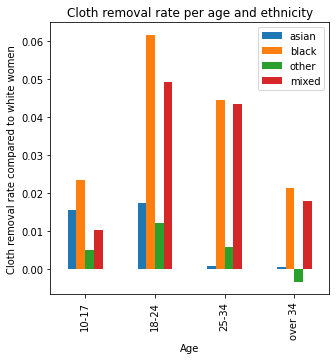

In [61]:
#df_cloth_removal_ethnicity_age.rename({'Unnamed: 0':'Age range'})
#df_cloth_removal_ethnicity_age=df_cloth_removal_ethnicity_age.set_index('Unnamed: 0')
df_cloth_removal_ethnicity_age_=df_cloth_removal_ethnicity_age.drop("under 10")
print(df_cloth_removal_ethnicity_age_.index)
df_cloth_removal_ethnicity_age_=df_cloth_removal_ethnicity_age_.sort_index()
df_cloth_removal_ethnicity_age_.plot.bar()
plt.xlabel("Age")
plt.ylabel("Cloth removal rate compared to white women")
plt.title("Cloth removal rate per age and ethnicity")


Type    person and vehicle search  person search  vehicle search
target                                                          
False                    0.764016       0.809402        0.701754
True                     0.235984       0.190598        0.298246


Text(0.5, 1.0, 'Search sucess rate per type of operation')

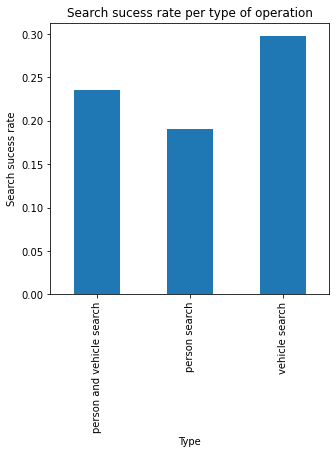

In [38]:
plt.rcParams["figure.figsize"]=[5,5]
crosstab_eth = pd.crosstab(df[target],df["Type"], normalize='columns')
print(crosstab_eth)
crosstab_eth.iloc[1].plot.bar()

plt.xlabel("Type")
plt.ylabel("Search sucess rate")
plt.title("Search sucess rate per type of operation")
#There are more black women in ages 18-24

Part of a policing operation     False      True   missing
target                                                    
False                         0.799059  0.766191  0.801685
True                          0.200941  0.233809  0.198315


Text(0.5, 1.0, 'Search sucess rate per if part of policing operation')

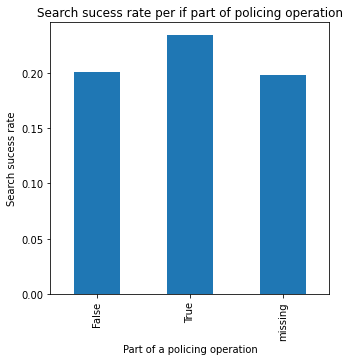

In [40]:
plt.rcParams["figure.figsize"]=[5,5]
crosstab_eth = pd.crosstab(df[target],df["Part of a policing operation"], normalize='columns')
print(crosstab_eth)
crosstab_eth.iloc[1].plot.bar()

plt.xlabel("Part of a policing operation")
plt.ylabel("Search sucess rate")
plt.title("Search sucess rate per if part of policing operation")
#There are more black women in ages 18-24

In [55]:
df_cloth_removal_gender_age.head()

,Unnamed: 0,female,other
0,18-24,-0.003617,0.004150
1,25-34,0.013470,0.041112
2,over 34,0.021519,0.033161
3,10-17,-0.001970,-0.015887
4,under 10,0.096631,NaN


<AxesSubplot:ylabel='Frequency'>

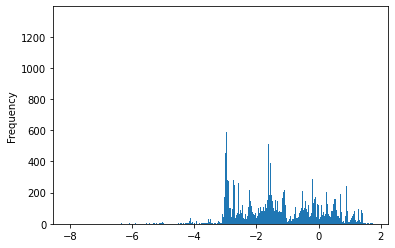

In [108]:
df[df[target]]["Longitude"].plot.hist(bins=1000)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([49.892149  , 49.96466607, 50.03718314, 50.10970021, 50.18221728,
        50.25473435, 50.32725142, 50.39976849, 50.47228556, 50.54480263,
        50.6173197 , 50.68983677, 50.76235384, 50.83487091, 50.90738798,
        50.97990505, 51.05242212, 51.12493919, 51.19745626, 51.26997333,
        51.3424904 , 51.41500747, 51.48752454, 51.56004161, 51.63255868,
        51.70507575, 51.77759282, 51.85010989, 51.92262696, 51.99514403,
        52.0676611 , 52.14017817, 52.21269524, 52.28521231, 52.35772938,
        52.43024645, 52.50276352, 52.57528059, 52.64779766, 52.72031473,
        52.7928318 , 52.86534887, 52.93786594, 53.01038301, 53.08290008,
        53.15541715, 53.22793422, 53.30045129, 53.37296836, 53.44548543,
        53.5180025 , 

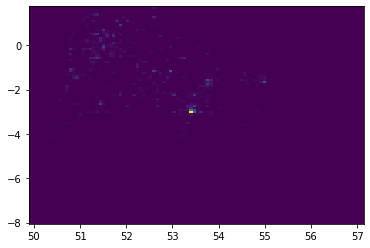

In [100]:
plt.hist2d(df["Latitude"].dropna(),df["Longitude"].dropna(),bins=100,density=True)




(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([49.892149  , 49.96466607, 50.03718314, 50.10970021, 50.18221728,
        50.25473435, 50.32725142, 50.39976849, 50.47228556, 50.54480263,
        50.6173197 , 50.68983677, 50.76235384, 50.83487091, 50.90738798,
        50.97990505, 51.05242212, 51.12493919, 51.19745626, 51.26997333,
        51.3424904 , 51.41500747, 51.48752454, 51.56004161, 51.63255868,
        51.70507575, 51.77759282, 51.85010989, 51.92262696, 51.99514403,
        52.0676611 , 52.14017817, 52.21269524, 52.28521231, 52.35772938,
        52.43024645, 52.50276352, 52.57528059, 52.64779766, 52.72031473,
        52.7928318 , 52.86534887, 52.93786594, 53.01038301, 53.08290008,
        53.15541715, 53.22793422, 53.30045129, 53.37296836, 53.44548543,
        53.5180025 , 

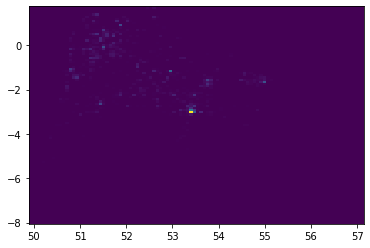

In [101]:
plt.hist2d(df[df[target]]["Latitude"].dropna(),df[df[target]]["Longitude"].dropna(),bins=100,density=True)

In [224]:

df_=df.copy()
df_=df_.drop(columns=['Unnamed: 0','ethnicity','observation_id'])
categorical_features = list(
        df_.select_dtypes(include=['object']).columns)

numerical = df_.drop(categorical_features, axis=1).columns


In [225]:
categorical_features

['Type',
 'Part of a policing operation',
 'Gender',
 'Age range',
 'Officer-defined ethnicity',
 'Legislation',
 'Object of search',
 'station']

In [226]:
mutual_info = mutual_info_classif(
    X=df_[categorical_features],
    y=df_[target])

ValueError: could not convert string to float: 'person search'

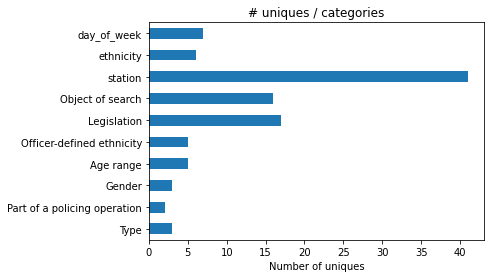

In [111]:
number_of_uniques_per_category = df_.loc[:, categorical_features].nunique()
number_of_uniques_per_category.plot(kind='barh',
                                    title='# uniques / categories');
plt.xlabel('Number of uniques')
plt.show()

In [112]:
pd.Series({
    colname: df_[colname].value_counts()
    for colname in numerical
}, index=numerical).plot.barh();

TypeError: no numeric data to plot

In [113]:
corr_matrix = df_.drop(categorical_features, axis=1).corr(method='spearman')
corr_matrix

,Latitude,Longitude,Outcome linked to object of search,Removal of more than just outer clothing,target,Outcome_true,year,month,hour,minute
Latitude,1.000000,-0.487287,0.057244,-0.008810,-0.027094,-0.057554,0.036787,0.002914,-0.023967,0.177194
Longitude,-0.487287,1.000000,0.020542,-0.012812,0.013530,0.061279,-0.011878,0.005985,0.018328,-0.215818
Outcome linked to object of search,0.057244,0.020542,1.000000,0.033868,0.725014,0.485174,-0.024504,-0.008886,0.009666,-0.007380
Removal of more than just outer clothing,-0.008810,-0.012812,0.033868,1.000000,0.045706,0.040182,-0.007422,-0.013456,-0.027221,-0.018368
target,-0.027094,0.013530,0.725014,0.045706,1.000000,0.766822,-0.008884,-0.007269,0.004268,-0.006393
Outcome_true,-0.057554,0.061279,0.485174,0.040182,0.766822,1.000000,-0.043618,-0.017575,-0.000946,-0.019809
year,0.036787,-0.011878,-0.024504,-0.007422,-0.008884,-0.043618,1.000000,-0.086988,-0.000541,0.013738
month,0.002914,0.005985,-0.008886,-0.013456,-0.007269,-0.017575,-0.086988,1.000000,0.014469,0.012378
hour,-0.023967,0.018328,0.009666,-0.027221,0.004268,-0.000946,-0.000541,0.014469,1.000000,-0.001686
minute,0.177194,-0.215818,-0.007380,-0.018368,-0.006393,-0.019809,0.013738,0.012378,-0.001686,1.000000


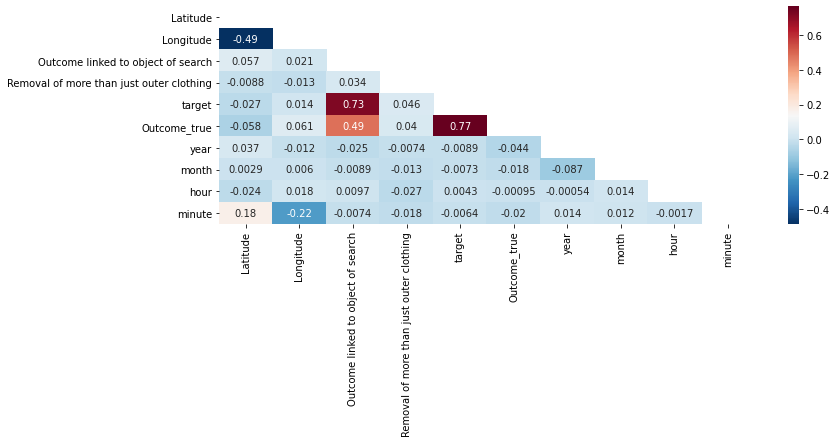

In [114]:
#Plot of correlation matrix 
lower_triangle_mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)
cor_mat_lower = corr_matrix.mask(lower_triangle_mask)

plt.figure(figsize = (12,4)) # <-- just sets the figure size 

sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); #

In [ ]:
numerical_features=df_[numerical].drop(columns=[target])
mutual_info = mutual_info_classif(
    X=numerical_features.fillna(0),  # as with so much in scikit, it does not like missing data
    y=df_[target])


In [ ]:
numerical_mutual_info = pd.Series(mutual_info, index=numerical_features.columns).sort_values()
numerical_mutual_info

In [ ]:
mutual_info = mutual_info_classif(
    X=df_[categorical_features],
    y=df_[target])

In [ ]:
categorical_mutual_info = pd.Series(mutual_info, index=categorical_features).sort_values()
categorical_mutual_info